# Source : 
https://rajeshrinet.github.io/

https://rajeshrinet.github.io/blog/2014/ising-model/

In [56]:
%matplotlib inline
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [60]:
def read_image(path):
    return mpimg.imread('img.jpg')

def rgb_to_grey_image(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

def reshape_image(grey_img, square_length):
    return grey_img[0:square_length, 0:square_length]

def normalize_image(reshaped_img):
    normalized_img = np.empty(reshaped_img.shape)
    for i in range (reshaped_img.shape[0]):
        for j in range (reshaped_img.shape[1]):
            normalized_img[i,j] = reshaped_img[i,j]/255
    return normalized_img

def default_preprocess_img(path):
    temp1 = read_image(path)
    temp2 = rgb_to_grey_image(temp1)
    temp3 = reshape_image(temp2, 300)
    return normalize_image(temp3)

In [65]:
def mcmove(config, N, beta):
    ''' This is to execute the monte carlo moves using 
    Metropolis algorithm such that detailed
    balance condition is satisified'''
    for i in range(N):
        for j in range(N):            
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:	
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config
              
                
def configPlot(f, config, i, N, n_):
    ''' This modules plts the configuration once passed to it along with time etc '''
    X, Y = np.meshgrid(range(N), range(N))
    sp =  f.add_subplot(3, 3, n_ )  
    plt.setp(sp.get_yticklabels(), visible=False)
    plt.setp(sp.get_xticklabels(), visible=False)      
    plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
    plt.title('Time=%d'%i); plt.axis('tight')

def simulate():   
    ''' This module simulates the Ising model'''
    config = default_preprocess_img('img.jpg')
    N, temp = config.shape[0], .4        # Initialse the lattice

    f = plt.figure(figsize=(15, 15), dpi=80);    
    configPlot(f, config, 0, N, 1);
    
    msrmnt = 1001
    plt.imshow(config)
    for i in range(msrmnt):
        mcmove(config, N, 1.0/temp)
        if i == 1:       configPlot(f, config, i, N, 2);
        if i == 4:       configPlot(f, config, i, N, 3);
        if i == 32:      configPlot(f, config, i, N, 4);
        if i == 100:     configPlot(f, config, i, N, 5);
        if i == 300:    configPlot(f, config, i, N, 6);

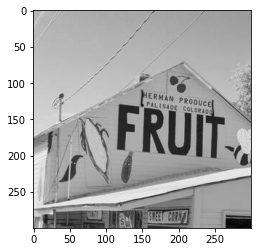

In [66]:
config = default_preprocess_img('img.jpg')
plt.imshow(config, cmap=plt.get_cmap('gray'))

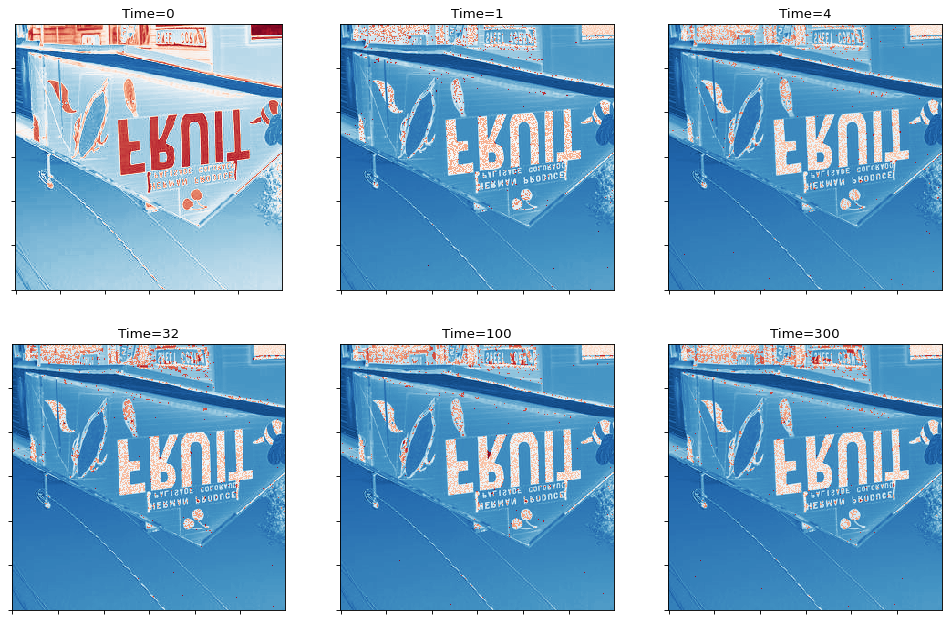

In [67]:
simulate()